In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
# Load the dataset
data = pd.read_excel("fraud.xlsx")

# Display the first few rows
data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-04-01 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [25]:
# Select relevant features
features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
X = data[features]

In [27]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

In [30]:
# Initialize KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans.fit(X_scaled)

# Assign cluster labels
data['Cluster'] = kmeans.labels_

In [31]:
# Calculate mean values for each cluster
cluster_summary = data.groupby('Cluster')[features].mean().reset_index()
print(cluster_summary)

   Cluster         amt        lat        long       city_pop  merch_lat  \
0        0  122.002301  39.660904 -100.402242   44243.913609  39.659593   
1        1  135.708916  45.937867 -122.730936   40034.164438  45.967328   
2        2  118.732869  34.614272 -118.559613  272401.368172  34.591782   

   merch_long  
0 -100.403091  
1 -122.731640  
2 -118.559936  


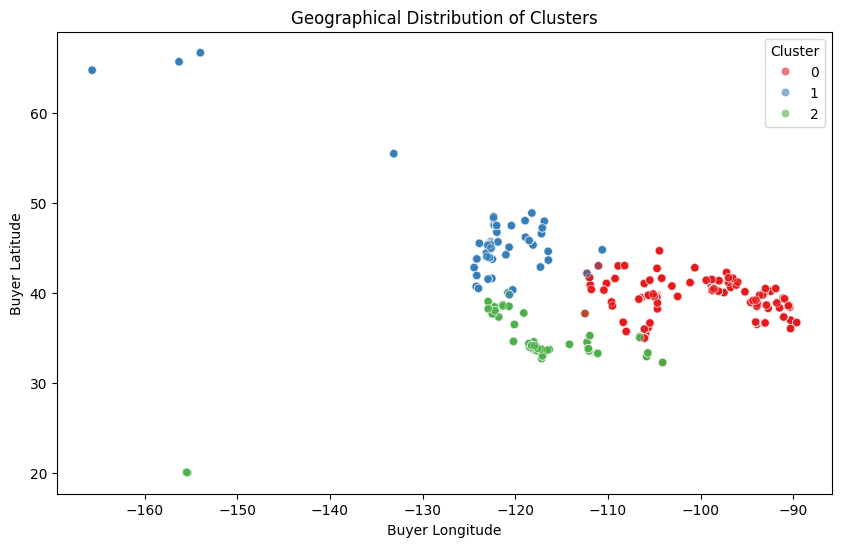

In [36]:
# Plotting the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', hue='Cluster', data=data, palette='Set1', alpha=0.6)
plt.title('Geographical Distribution of Clusters')
plt.xlabel('Buyer Longitude')
plt.ylabel('Buyer Latitude')
plt.legend(title='Cluster')
plt.show()

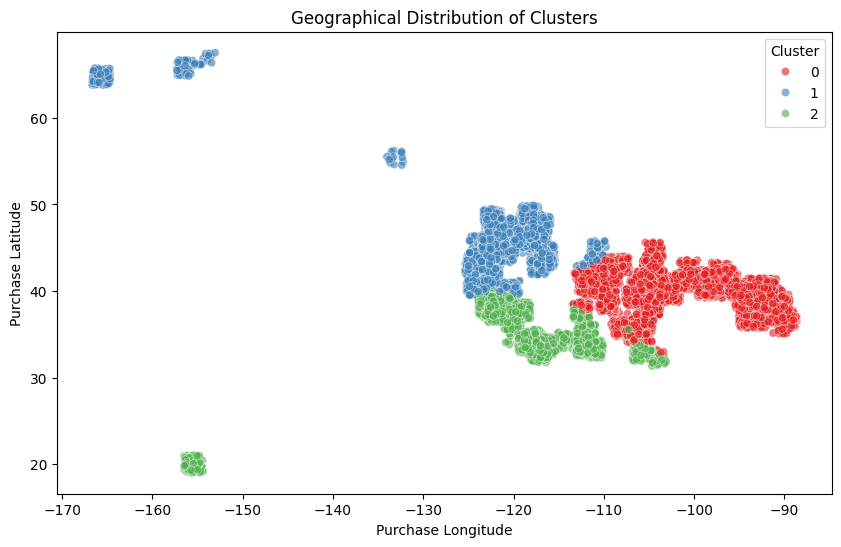

In [ ]:
# Plotting the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='merch_long', y='merch_lat', hue='Cluster', data=data, palette='Set1', alpha=0.6)
plt.title('Geographical Distribution of Clusters')
plt.xlabel('Seller Longitude')
plt.ylabel('Seller Latitude')
plt.legend(title='Cluster')
plt.show()

In [33]:
print(f"Within-Cluster Sum of Squares (Inertia): {kmeans.inertia_}")

Within-Cluster Sum of Squares (Inertia): 50247.86368694099


C:\Users\pcace\AppData\Local\Temp\ipykernel_5372\4068450750.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='Set2')
C:\Users\pcace\AppData\Local\Temp\ipykernel_5372\4068450750.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='Set2')
C:\Users\pcace\AppData\Local\Temp\ipykernel_5372\4068450750.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=data, palette='Set2')
C:\Users\pcace\AppData\Local\Temp\ipykernel_5372\406845075

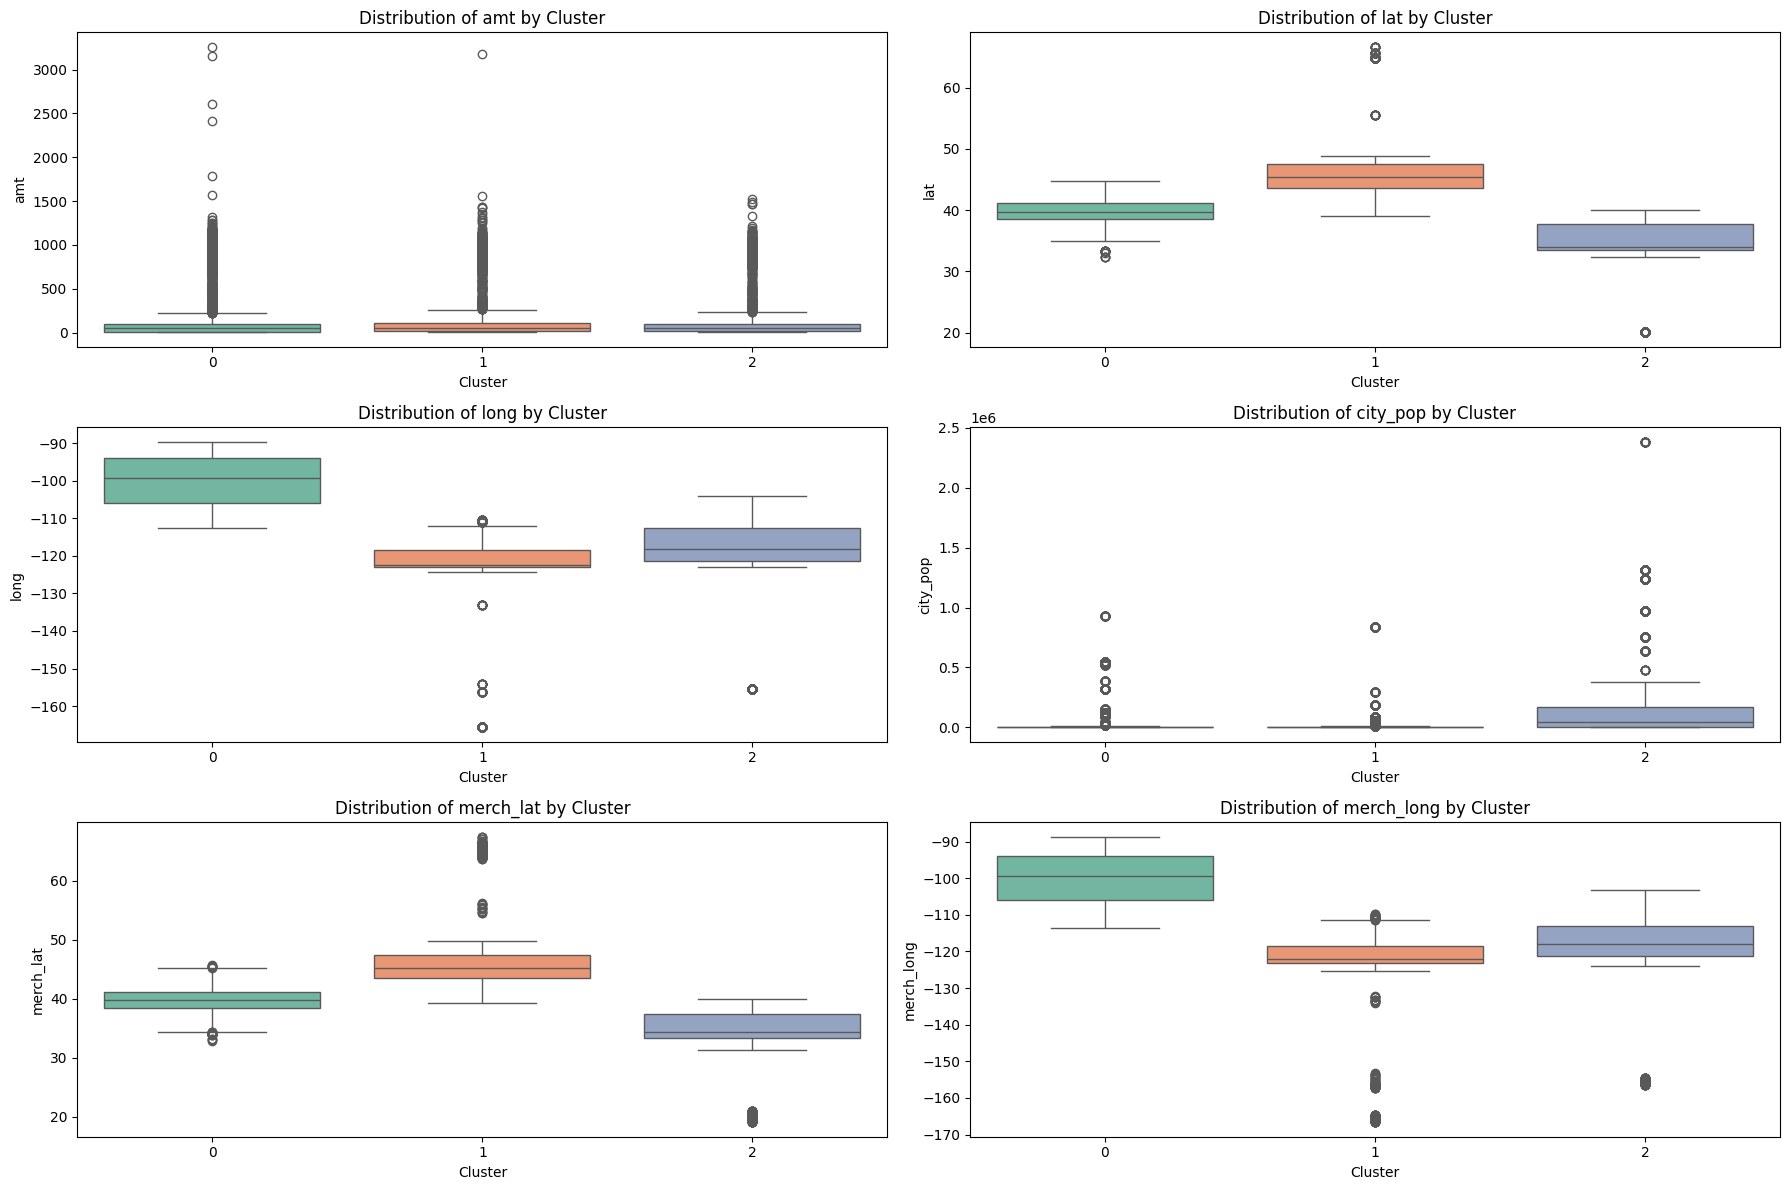

In [34]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 12))

# List of features to plot
for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x='Cluster', y=feature, data=data, palette='Set2')
    plt.title(f'Distribution of {feature} by Cluster')

plt.tight_layout()
plt.show()

In [38]:
def plot_boxplots(data, features, cluster_column='Cluster'):
    """
    Plots boxplots for each feature grouped by clusters.

    Parameters:
    - data: pandas DataFrame containing the data.
    - features: list of feature names to plot.
    - cluster_column: name of the column containing cluster labels.
    """
    num_features = len(features)
    plt.figure(figsize=(18, 12))
    
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 2, i)
        sns.boxplot(x=cluster_column, y=feature, data=data, palette='Set2')
        plt.title(f'Distribution of {feature} by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(feature)
    
    plt.tight_layout()
    plt.show()

C:\Users\pcace\AppData\Local\Temp\ipykernel_5372\198539542.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_column, y=feature, data=data, palette='Set2')
C:\Users\pcace\AppData\Local\Temp\ipykernel_5372\198539542.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_column, y=feature, data=data, palette='Set2')
C:\Users\pcace\AppData\Local\Temp\ipykernel_5372\198539542.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_column, y=feature, data=data, palette='Set2')
C:\Users\pcace\AppData\Local\Temp\ipykernel

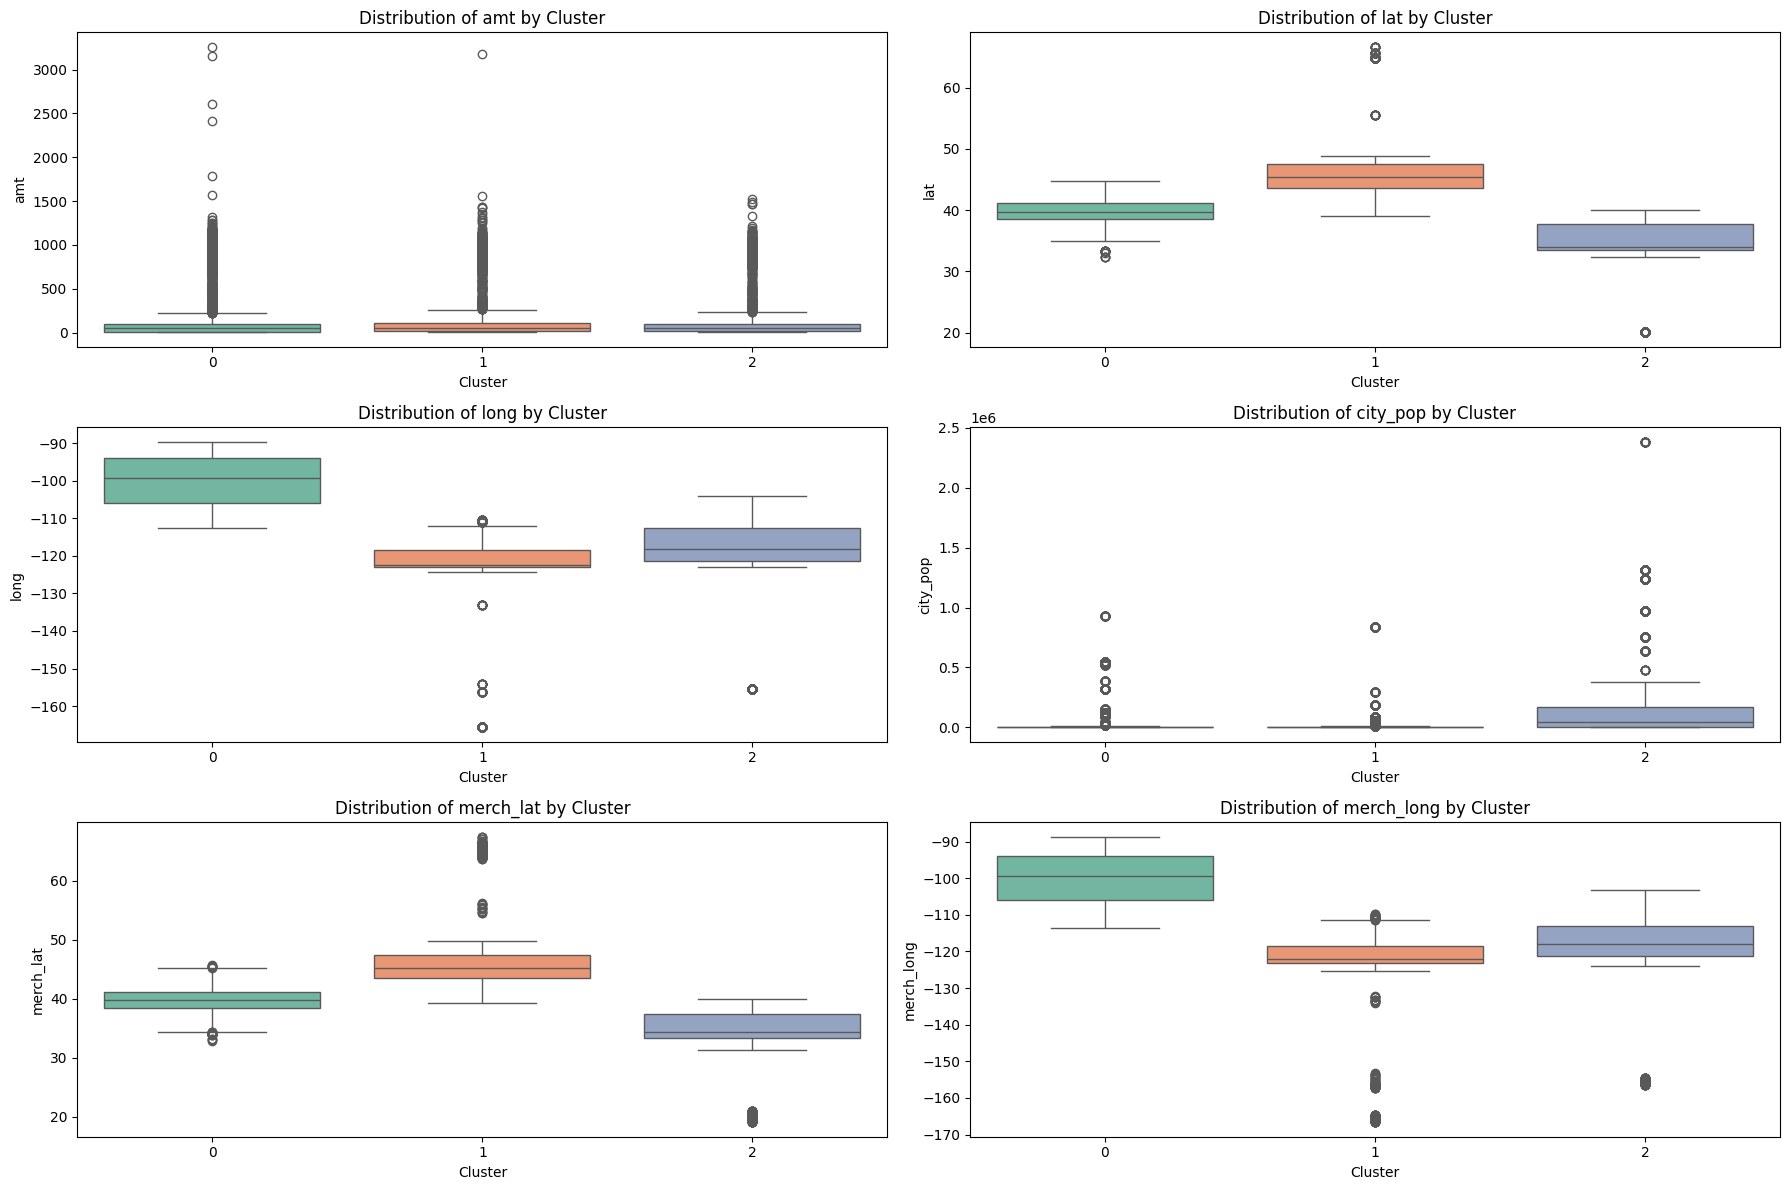

In [39]:
# Define the features to plot
features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

# Plot boxplots
plot_boxplots(data, features)

C:\Users\pcace\AppData\Local\Temp\ipykernel_5372\2441950619.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cluster_column, y=feature, data=data, palette='Set3')
C:\Users\pcace\AppData\Local\Temp\ipykernel_5372\2441950619.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cluster_column, y=feature, data=data, palette='Set3')
C:\Users\pcace\AppData\Local\Temp\ipykernel_5372\2441950619.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cluster_column, y=feature, data=data, palette='Set3')
C:\Users\pcace\AppData\Local\Te

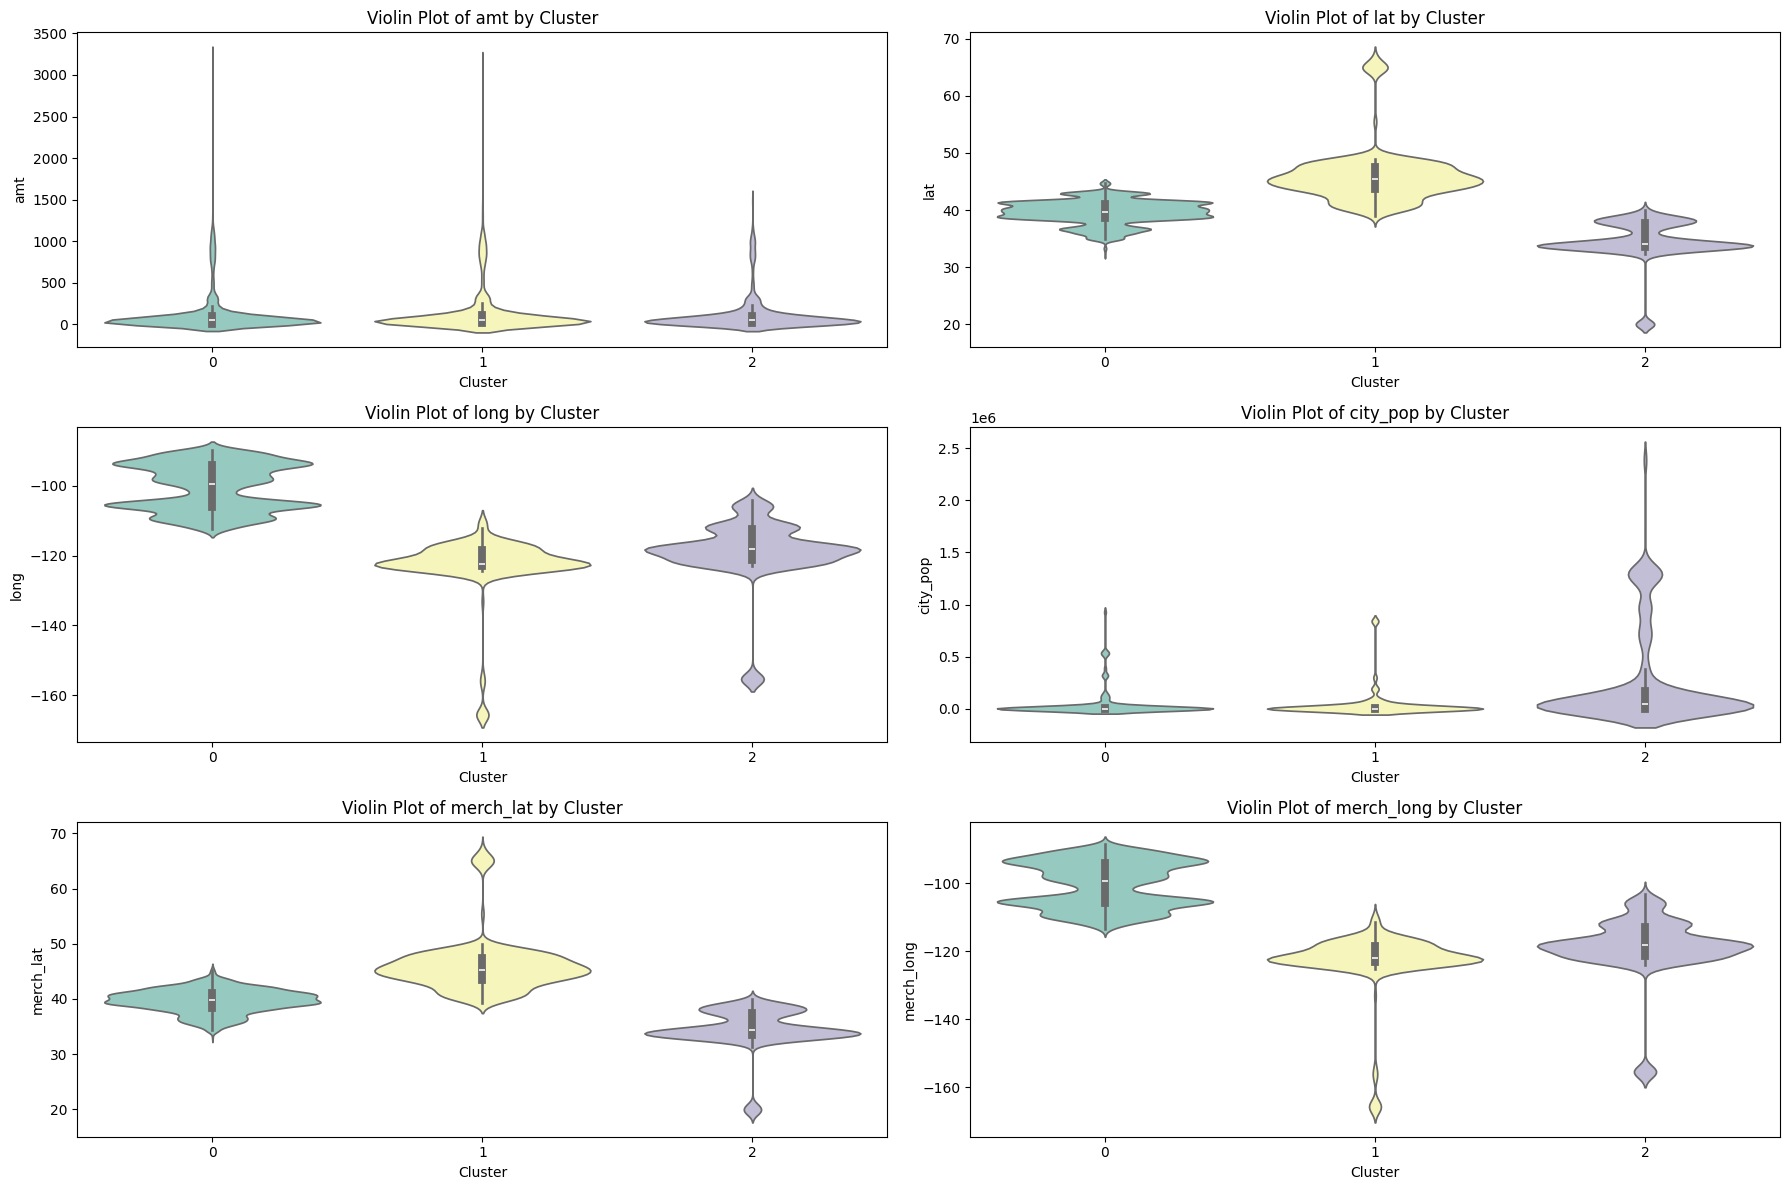

In [41]:
def plot_violinplots(data, features, cluster_column='Cluster'):
    """
    Plots violin plots for each feature grouped by clusters.

    Parameters:
    - data: pandas DataFrame containing the data.
    - features: list of feature names to plot.
    - cluster_column: name of the column containing cluster labels.
    """
    num_features = len(features)
    plt.figure(figsize=(18, 12))
    
    for i, feature in enumerate(features, 1):
        plt.subplot(3, 2, i)
        sns.violinplot(x=cluster_column, y=feature, data=data, palette='Set3')
        plt.title(f'Violin Plot of {feature} by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel(feature)
    
    plt.tight_layout()
    plt.show()
# Plot violin plots
plot_violinplots(data, features)

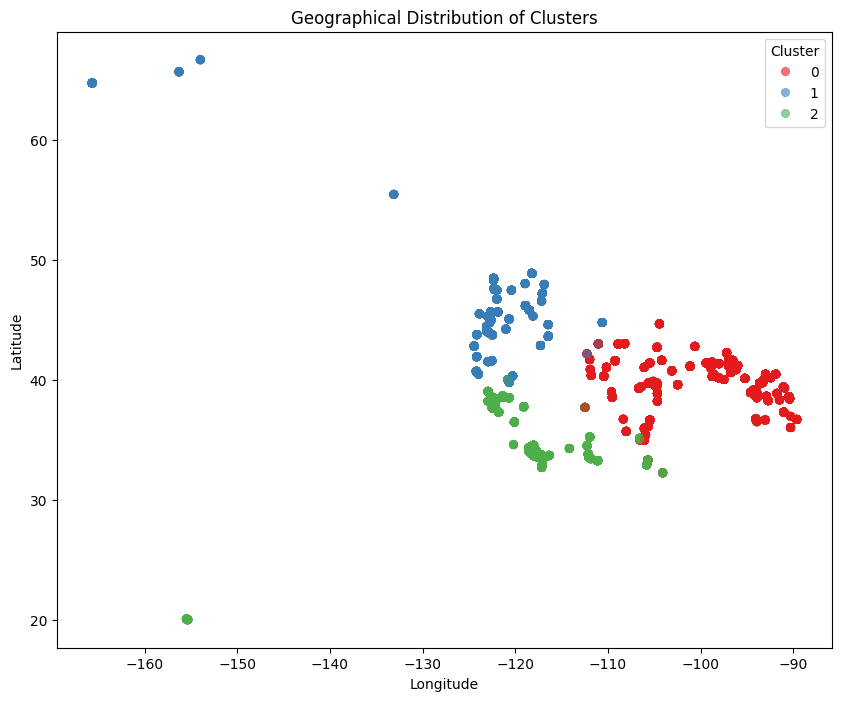

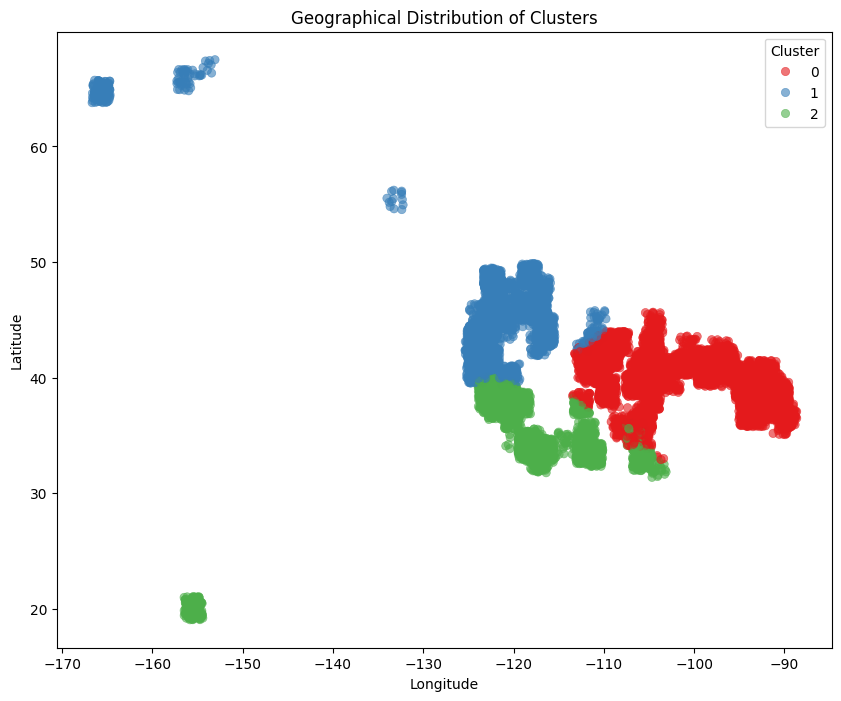

In [42]:
def plot_geographical_clusters(data, x_col='long', y_col='lat', cluster_col='Cluster'):
    """
    Plots a scatter plot of geographical data colored by clusters.

    Parameters:
    - data: pandas DataFrame containing the data.
    - x_col: column name for the x-axis (longitude).
    - y_col: column name for the y-axis (latitude).
    - cluster_col: column name for cluster labels.
    """
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=x_col, y=y_col, hue=cluster_col, data=data, palette='Set1', alpha=0.6, edgecolor=None)
    plt.title('Geographical Distribution of Clusters')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title='Cluster')
    plt.show()
# Plot geographical clusters based on Purchase Location
plot_geographical_clusters(data, x_col='long', y_col='lat', cluster_col='Cluster')

# Optionally, plot based on Merchant Location
plot_geographical_clusters(data, x_col='merch_long', y_col='merch_lat', cluster_col='Cluster')

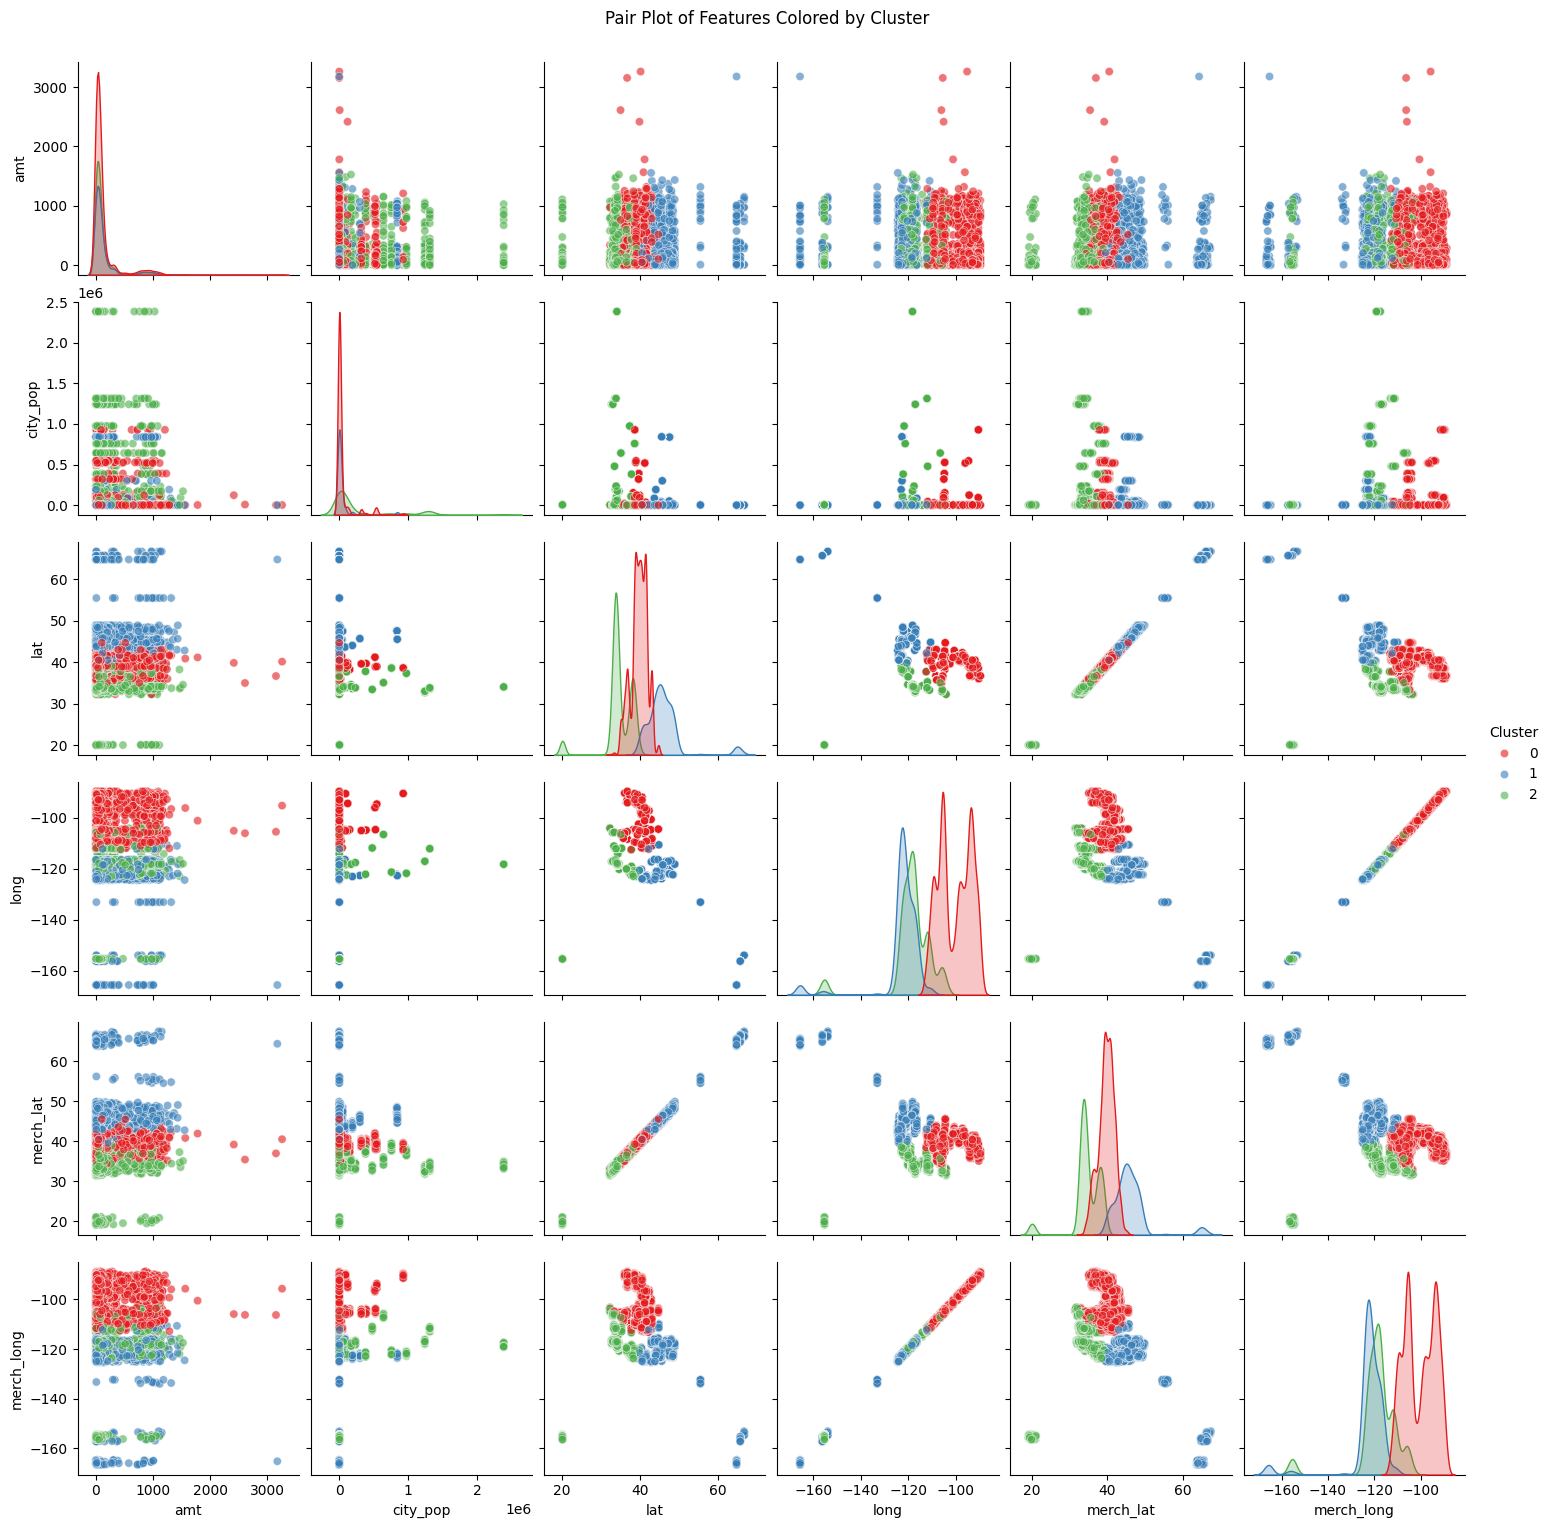

In [43]:
# Due to the high number of variables, we'll select a subset for clarity
pair_features = ['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']

# Generate the pair plot
sns.pairplot(data, vars=pair_features, hue='Cluster', palette='Set1', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Features Colored by Cluster', y=1.02)
plt.show()

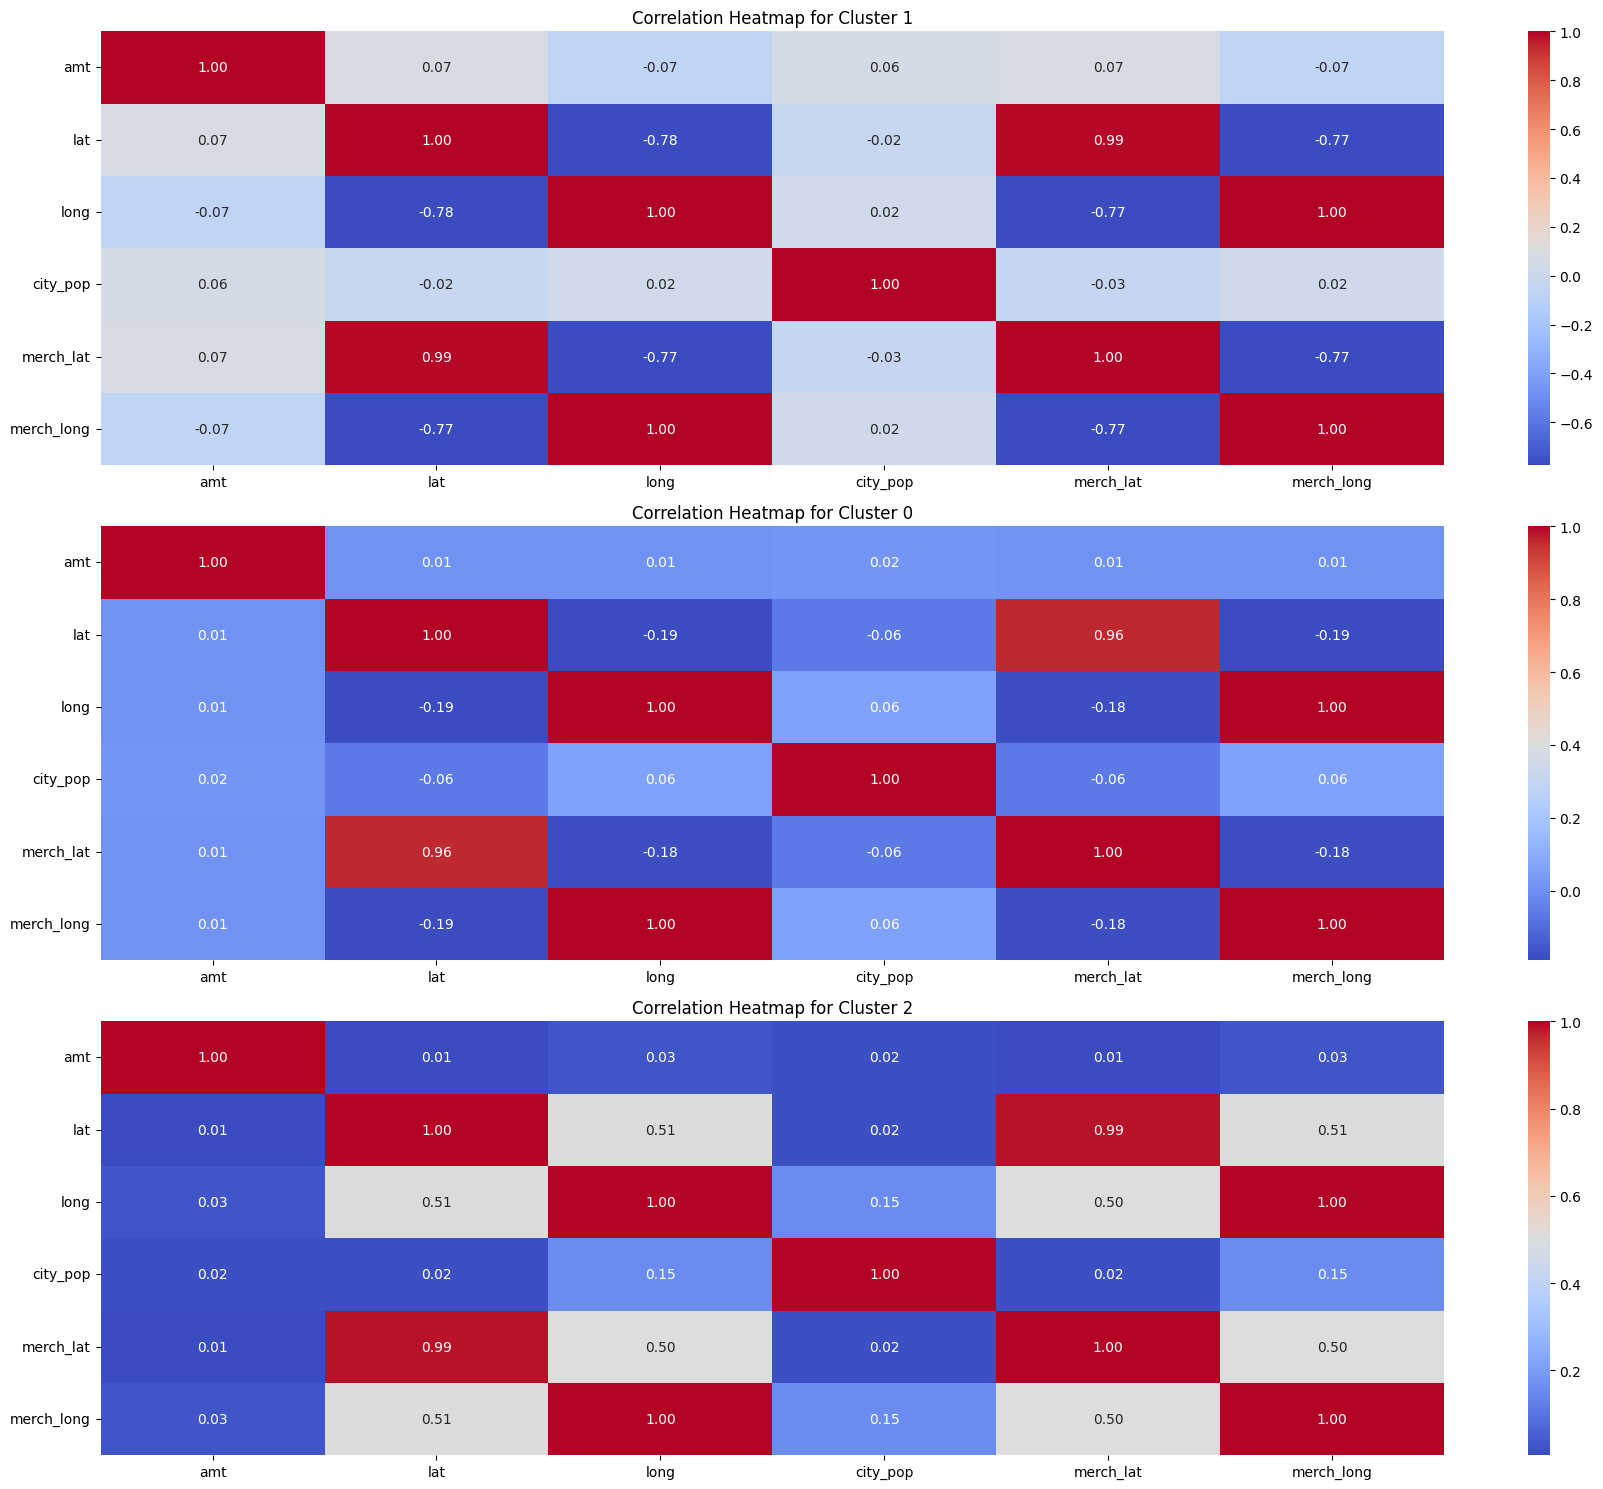

In [44]:
def plot_heatmaps(data, features, cluster_col='Cluster'):
    """
    Plots heatmaps of feature correlations for each cluster.

    Parameters:
    - data: pandas DataFrame containing the data.
    - features: list of feature names to include in the correlation.
    - cluster_col: column name for cluster labels.
    """
    clusters = data[cluster_col].unique()
    num_clusters = len(clusters)
    plt.figure(figsize=(18, 5 * num_clusters))
    
    for i, cluster in enumerate(clusters, 1):
        plt.subplot(num_clusters, 1, i)
        cluster_data = data[data[cluster_col] == cluster]
        corr = cluster_data[features].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'Correlation Heatmap for Cluster {cluster}')
    
    plt.tight_layout()
    plt.show()
# Plot heatmaps for each cluster
plot_heatmaps(data, features, cluster_col='Cluster')